In [1]:
import pandas as pd 
import numpy as np 
import pymysql
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Connect to MySQL using PyMySQL
db_connection = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="abc123",
    database="mobiledb"
)
cursor = db_connection.cursor()

# Define the SQL query
query = """
SELECT 
    User_ID, 
    Device_Model, 
    Operating_System, 
    App_Usage_Time, 
    Screen_On_Time, 
    Battery_Drain, 
    Number_of_Apps_Installed, 
    Data_Usage, 
    Age, 
    Gender, 
    User_Behavior_Class 
FROM 
    tablename;
"""

try:
    # Execute the SQL query
    cursor.execute(query)
    
    # Check the number of rows returned
    row_count = cursor.rowcount
    print(f"Number of rows returned: {row_count}")

    # Fetch all results
    data = cursor.fetchall()
    
    # Print the fetched data for debugging
    print(f"Fetched data: {data}")

    # Check if any data was returned
    if data:
        # Create the DataFrame
        df = pd.DataFrame(data, columns=[
            'User_ID', 
            'Device_Model', 
            'Operating_System', 
            'App_Usage_Time', 
            'Screen_On_Time', 
            'Battery_Drain', 
            'Number_of_Apps_Installed', 
            'Data_Usage', 
            'Age', 
            'Gender', 
            'User_Behavior_Class'
        ])
        print(df)
    else:
        print("No data returned from the query.")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and database connection
    if cursor is not None:
        cursor.close()
    if db_connection is not None:
        db_connection.close()


Number of rows returned: 700
Fetched data: ((1, 'Google Pixel 5', 'Android', 393, 6.4, 1872, 67, 1122, 40, 'Male', 4), (2, 'OnePlus 9', 'Android', 268, 4.7, 1331, 42, 944, 47, 'Female', 3), (3, 'Xiaomi Mi 11', 'Android', 154, 4.0, 761, 32, 322, 42, 'Male', 2), (4, 'Google Pixel 5', 'Android', 239, 4.8, 1676, 56, 871, 20, 'Male', 3), (5, 'iPhone 12', 'iOS', 187, 4.3, 1367, 58, 988, 31, 'Female', 3), (6, 'Google Pixel 5', 'Android', 99, 2.0, 940, 35, 564, 31, 'Male', 2), (7, 'Samsung Galaxy S21', 'Android', 350, 7.3, 1802, 66, 1054, 21, 'Female', 4), (8, 'OnePlus 9', 'Android', 543, 11.4, 2956, 82, 1702, 31, 'Male', 5), (9, 'Samsung Galaxy S21', 'Android', 340, 7.7, 2138, 75, 1053, 42, 'Female', 4), (10, 'iPhone 12', 'iOS', 424, 6.6, 1957, 75, 1301, 42, 'Male', 4), (11, 'Google Pixel 5', 'Android', 53, 1.4, 435, 17, 162, 34, 'Female', 1), (12, 'OnePlus 9', 'Android', 215, 5.5, 1690, 47, 641, 24, 'Male', 3), (13, 'OnePlus 9', 'Android', 462, 6.2, 2303, 65, 1099, 57, 'Female', 4), (14, 'Xi

In [3]:
print(df.info())
print(df.isnull().sum())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   700 non-null    int64  
 1   Device_Model              700 non-null    object 
 2   Operating_System          700 non-null    object 
 3   App_Usage_Time            700 non-null    int64  
 4   Screen_On_Time            700 non-null    float64
 5   Battery_Drain             700 non-null    int64  
 6   Number_of_Apps_Installed  700 non-null    int64  
 7   Data_Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User_Behavior_Class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
User_ID                     0
Device_Model                0
Operating_System            0
App_Usage_Time        

Univariate analysis: A statistical method that examines a single variable in a data set to describe or summarize it

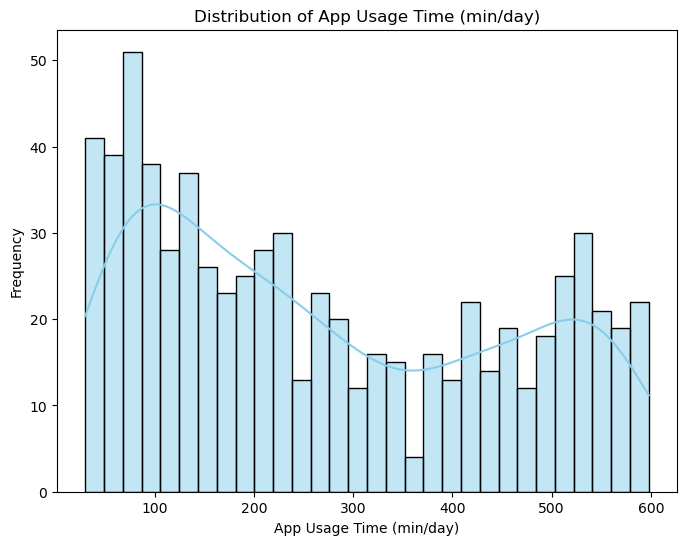

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App_Usage_Time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

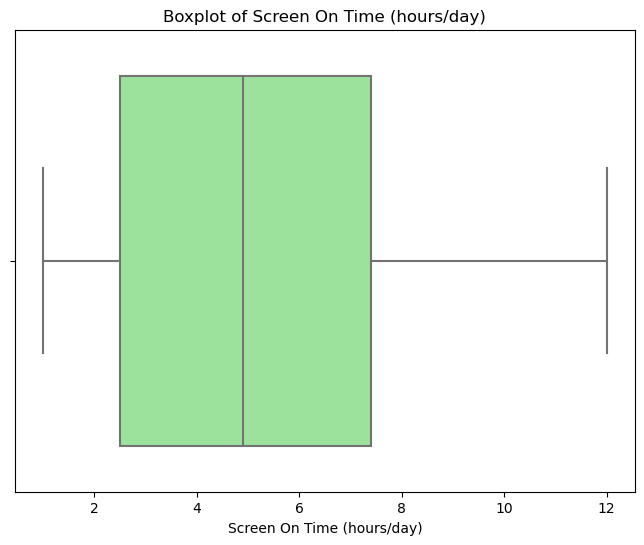

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen_On_Time'], color='lightgreen')
plt.title('Boxplot of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.show()

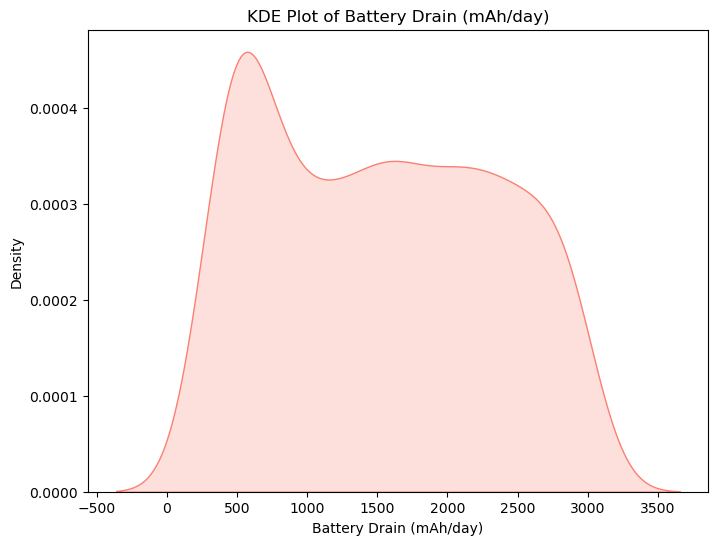

In [6]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery_Drain'], shade=True, color='salmon')
plt.title('KDE Plot of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()

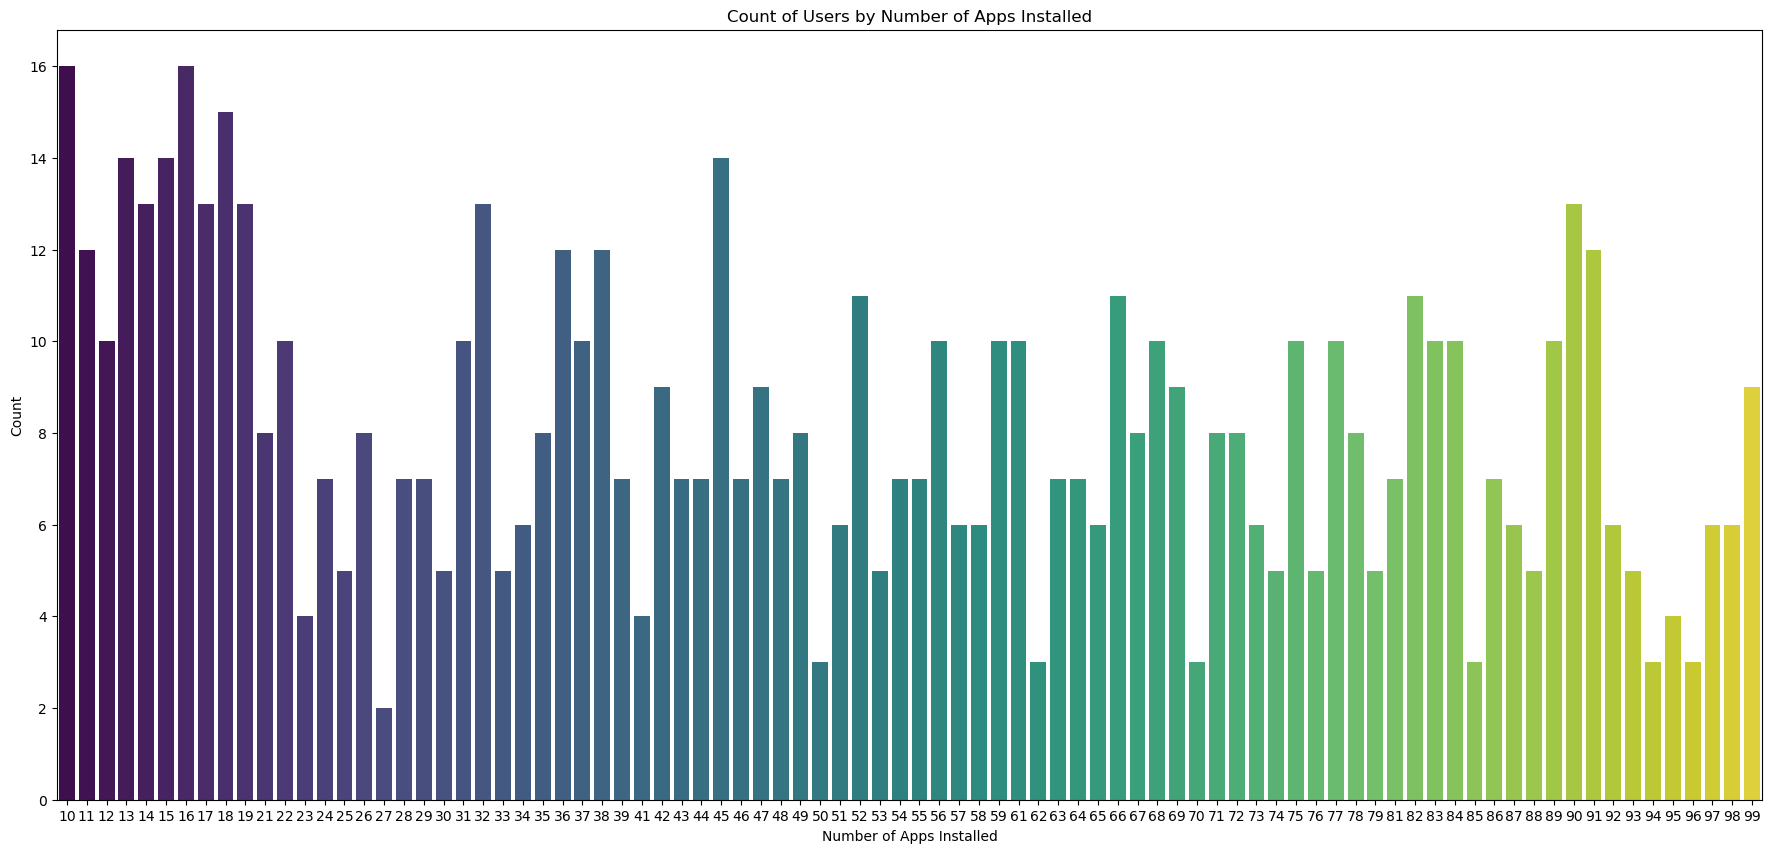

In [7]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number_of_Apps_Installed', data=df, palette='viridis')
plt.title('Count of Users by Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Count')
plt.show()

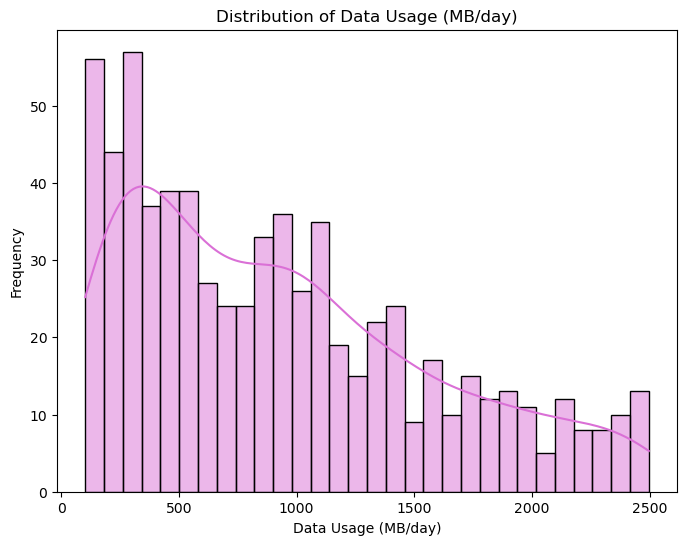

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data_Usage'], bins=30, color='orchid', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

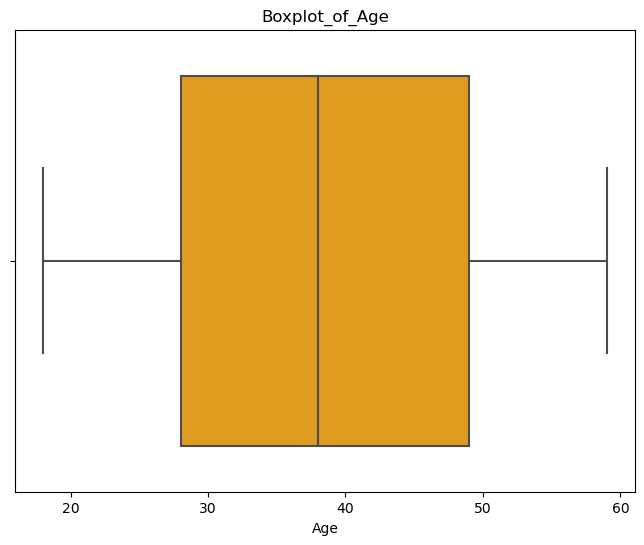

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'], color='orange')
plt.title('Boxplot_of_Age')
plt.xlabel('Age')
plt.show()

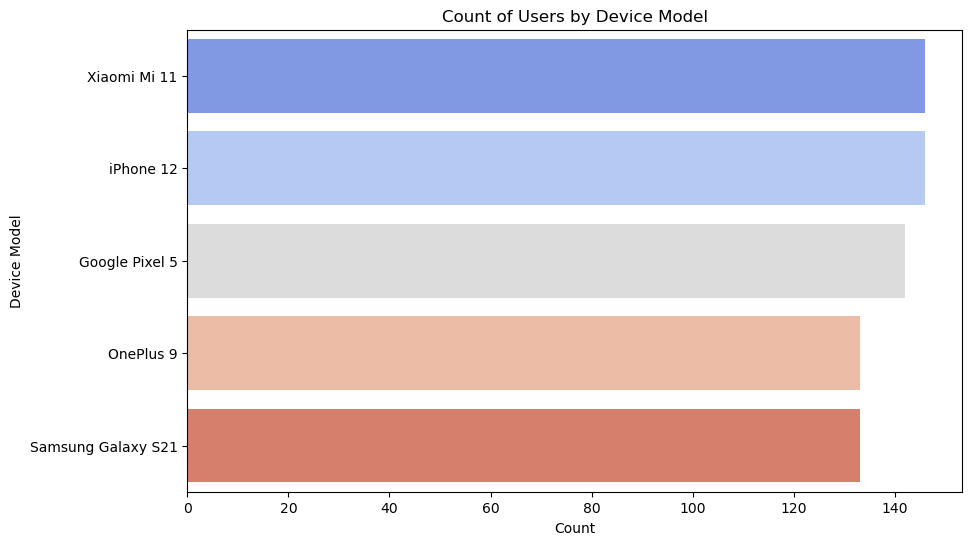

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Device_Model', data=df, order=df['Device_Model'].value_counts().index, palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

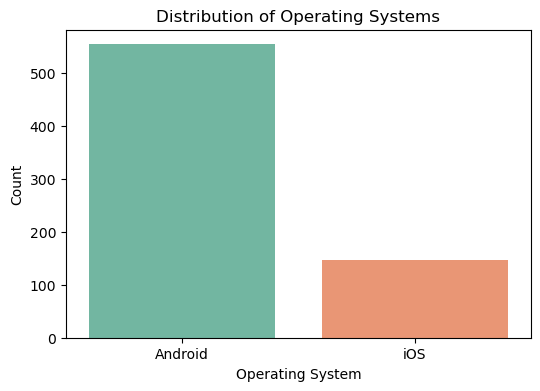

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating_System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

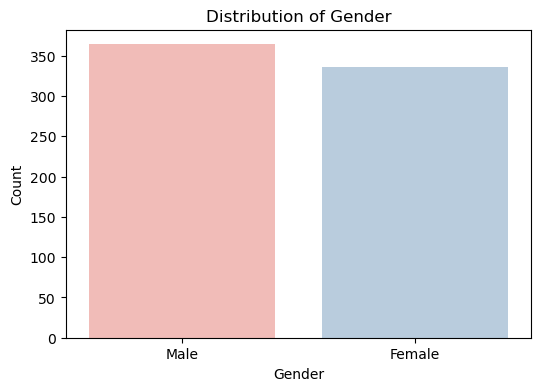

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Pastel1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Bivariate analysis: A statistical method that analyzes the relationship between two variables simultaneously.

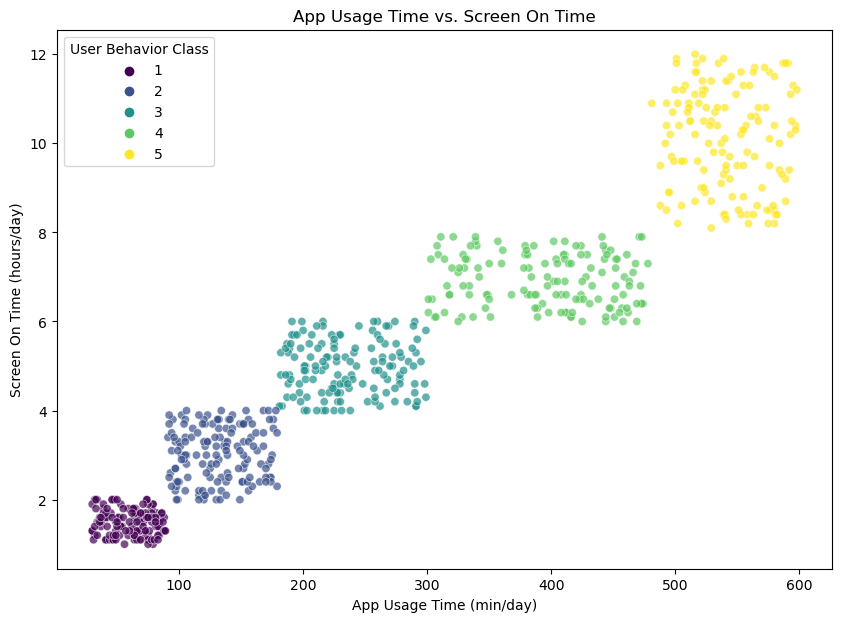

In [13]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='App_Usage_Time', 
    y='Screen_On_Time', 
    hue='User_Behavior_Class', 
    palette='viridis', 
    alpha=0.7
)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

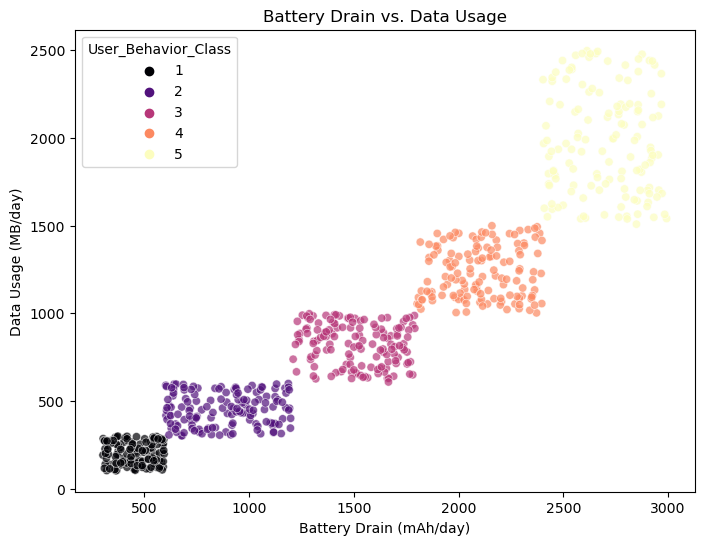

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Battery_Drain', y='Data_Usage', hue='User_Behavior_Class', palette='magma', alpha=0.7)
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

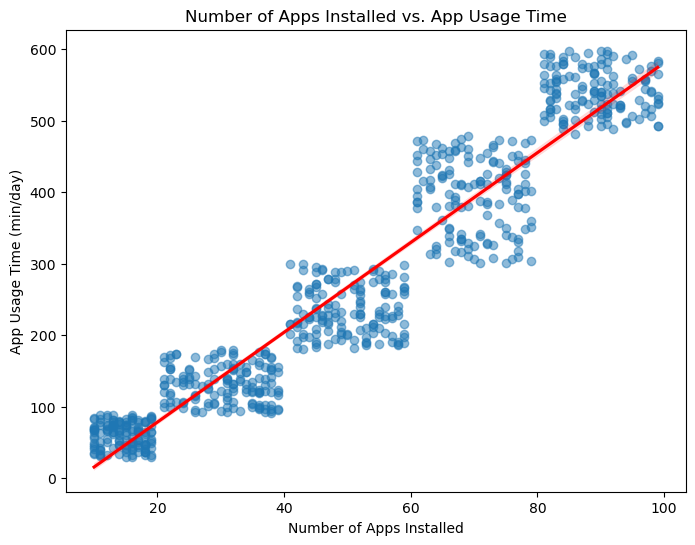

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Number_of_Apps_Installed', y='App_Usage_Time', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Apps Installed vs. App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

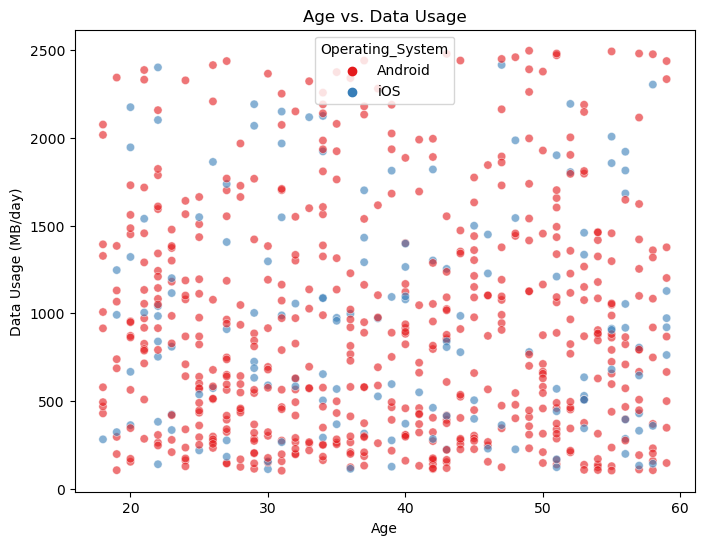

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Data_Usage', hue='Operating_System', palette='Set1', alpha=0.6)
plt.title('Age vs. Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()

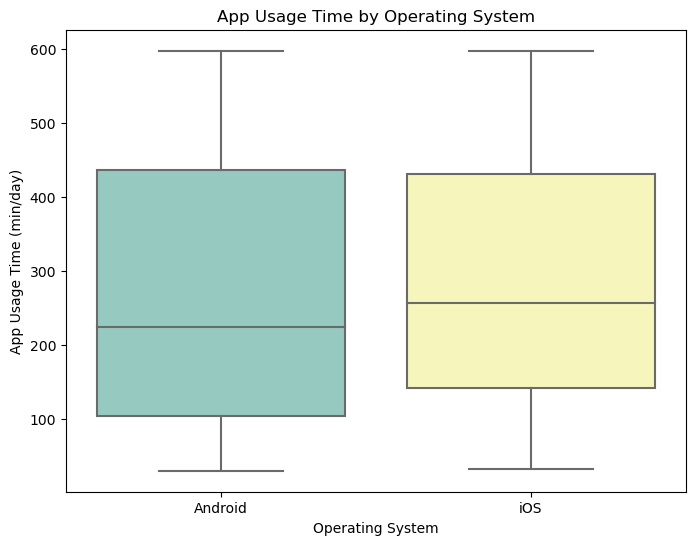

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating_System', y='App_Usage_Time', data=df, palette='Set3')
plt.title('App Usage Time by Operating System')
plt.xlabel('Operating System')
plt.ylabel('App Usage Time (min/day)')
plt.show()

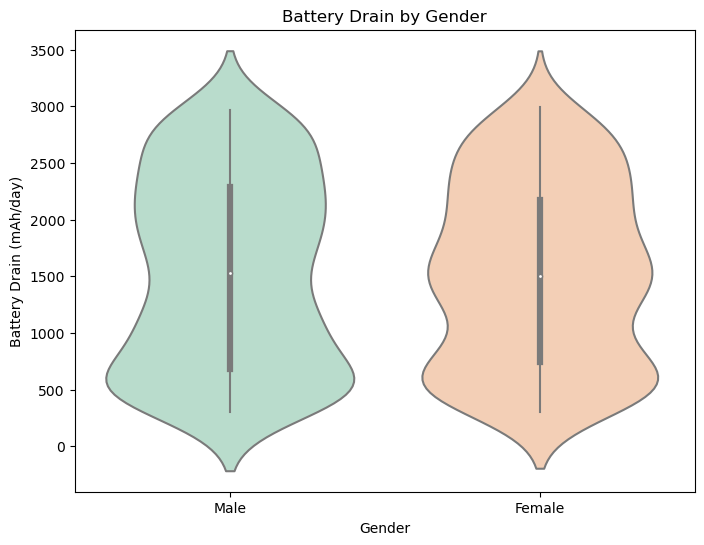

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Battery_Drain', data=df, palette='Pastel2')
plt.title('Battery Drain by Gender')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

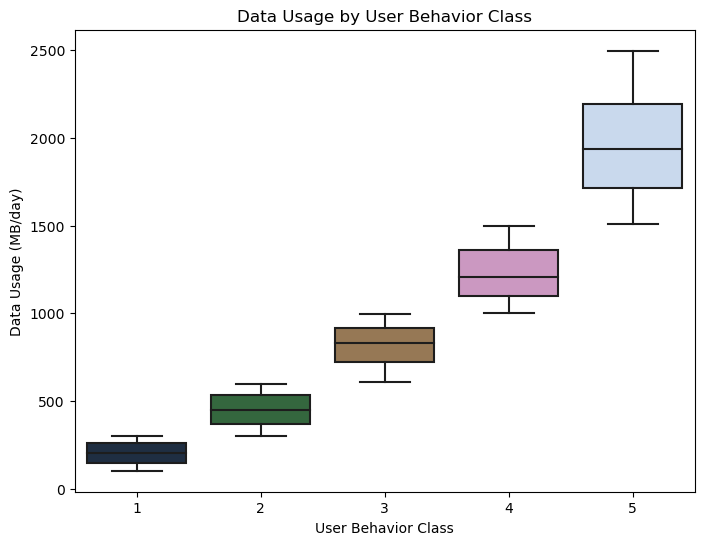

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User_Behavior_Class', y='Data_Usage', data=df, palette='cubehelix')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()

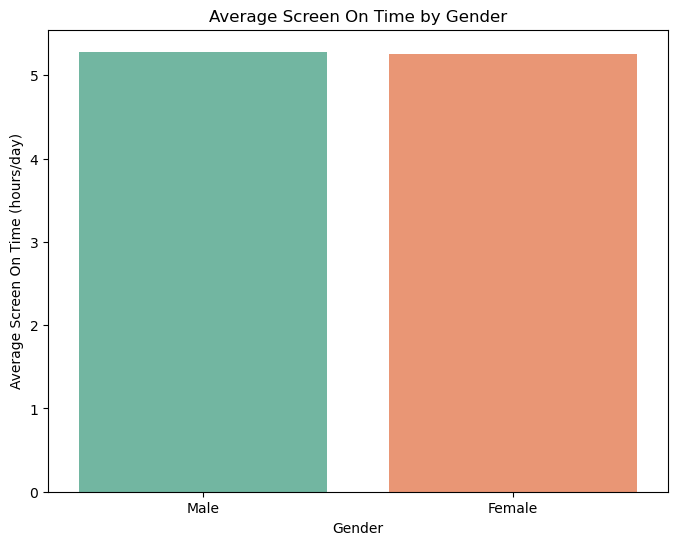

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen_On_Time', data=df, palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()

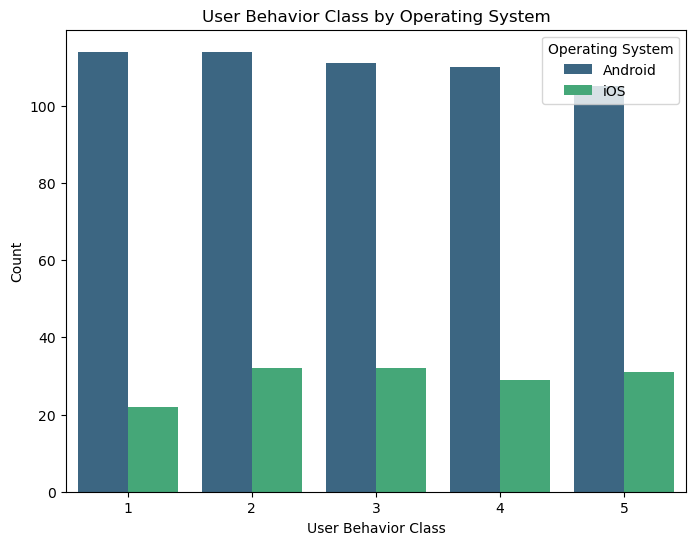

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User_Behavior_Class', hue='Operating_System', data=df, palette='viridis')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

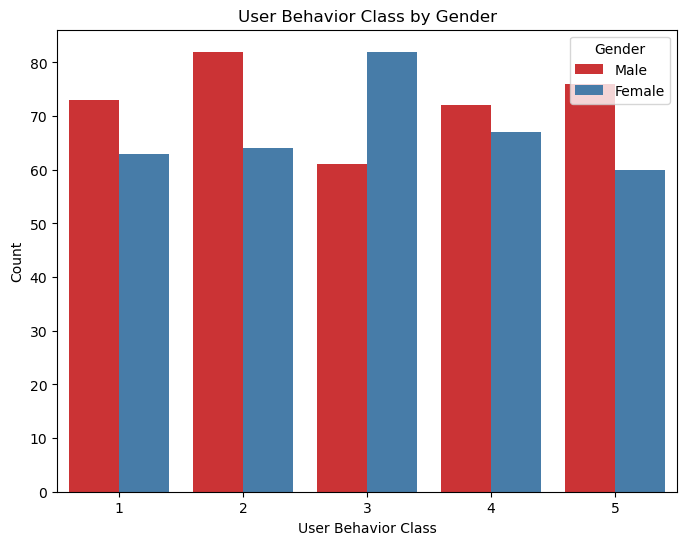

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User_Behavior_Class', hue='Gender', data=df, palette='Set1')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Multivariate analysis (MVA): A statistical technique that examines multiple variables simultaneously to identify relationships between them.

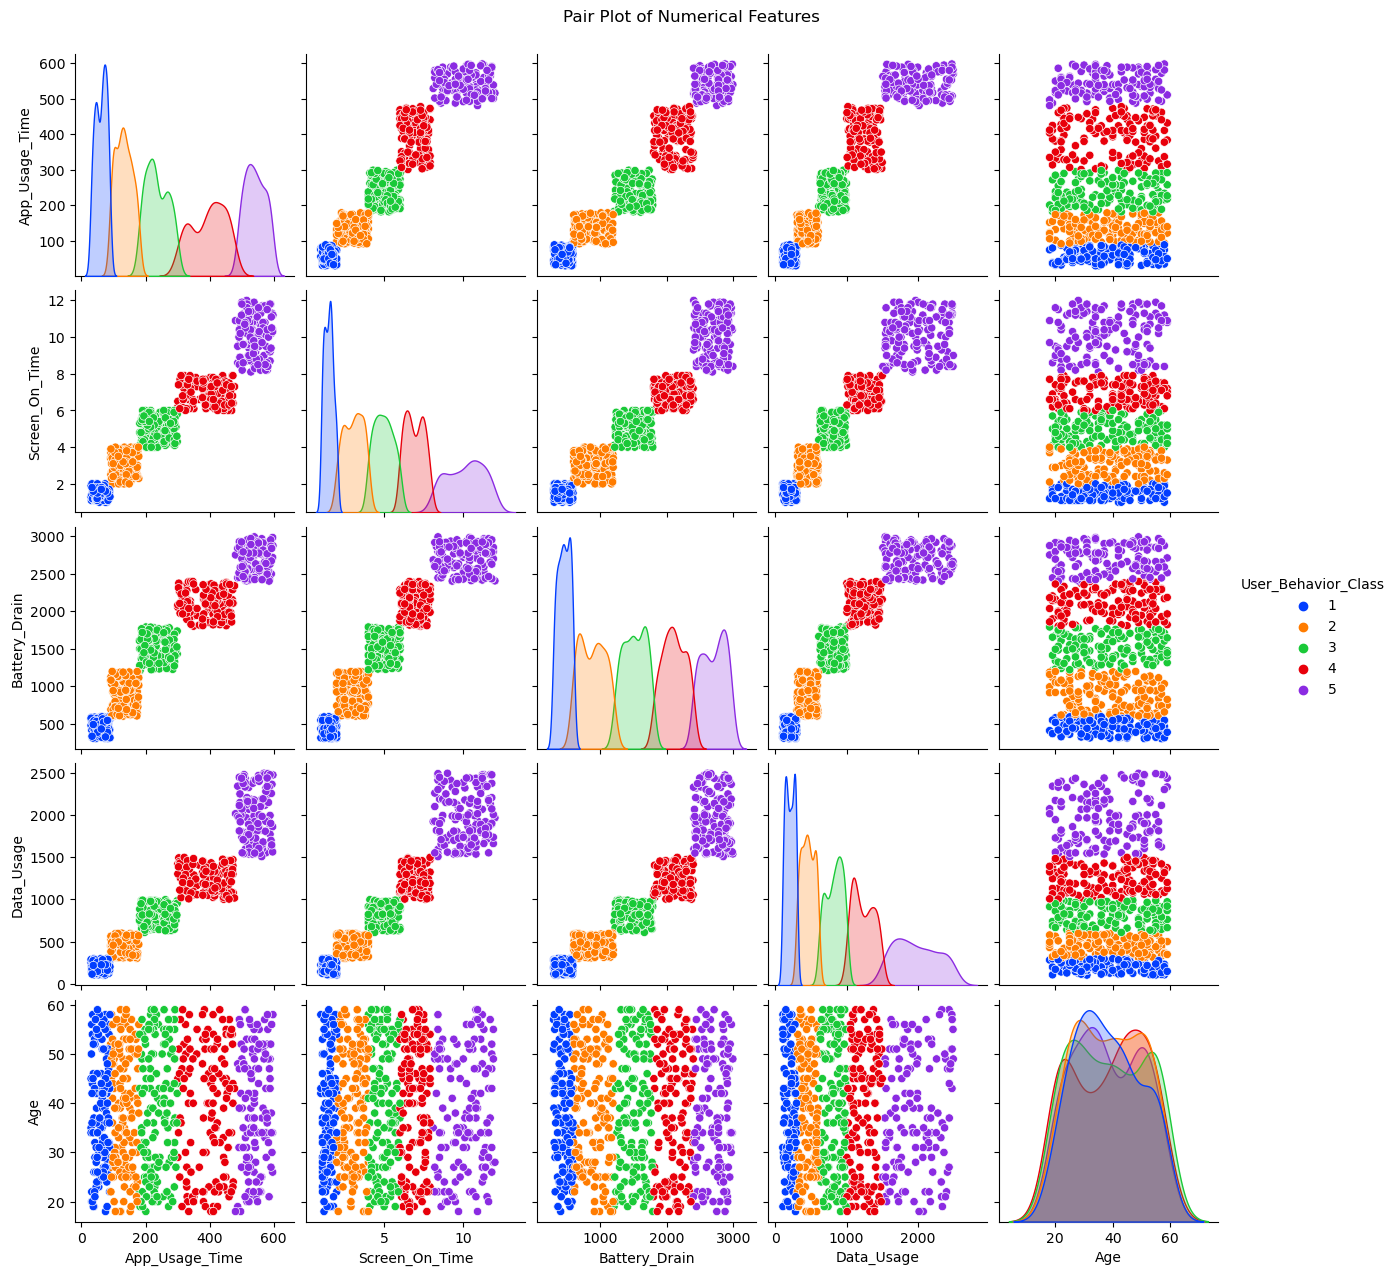

In [23]:
sns.pairplot(df, vars=['App_Usage_Time', 'Screen_On_Time', 'Battery_Drain', 'Data_Usage', 'Age'], hue='User_Behavior_Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

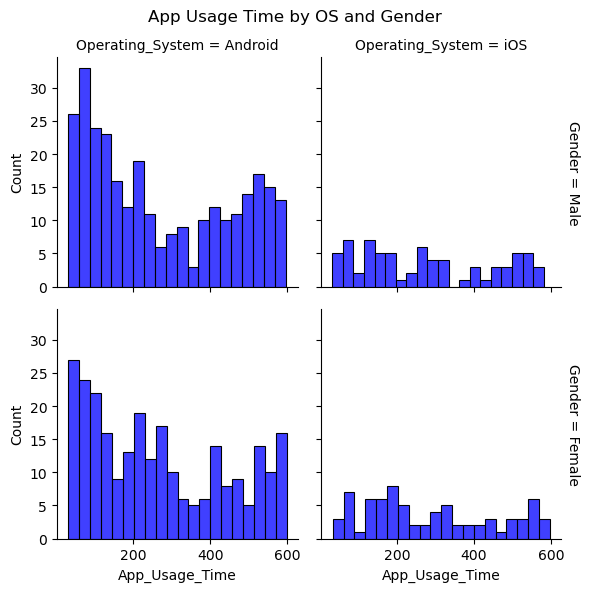

In [24]:
g = sns.FacetGrid(df, col='Operating_System', row='Gender', margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App_Usage_Time', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()

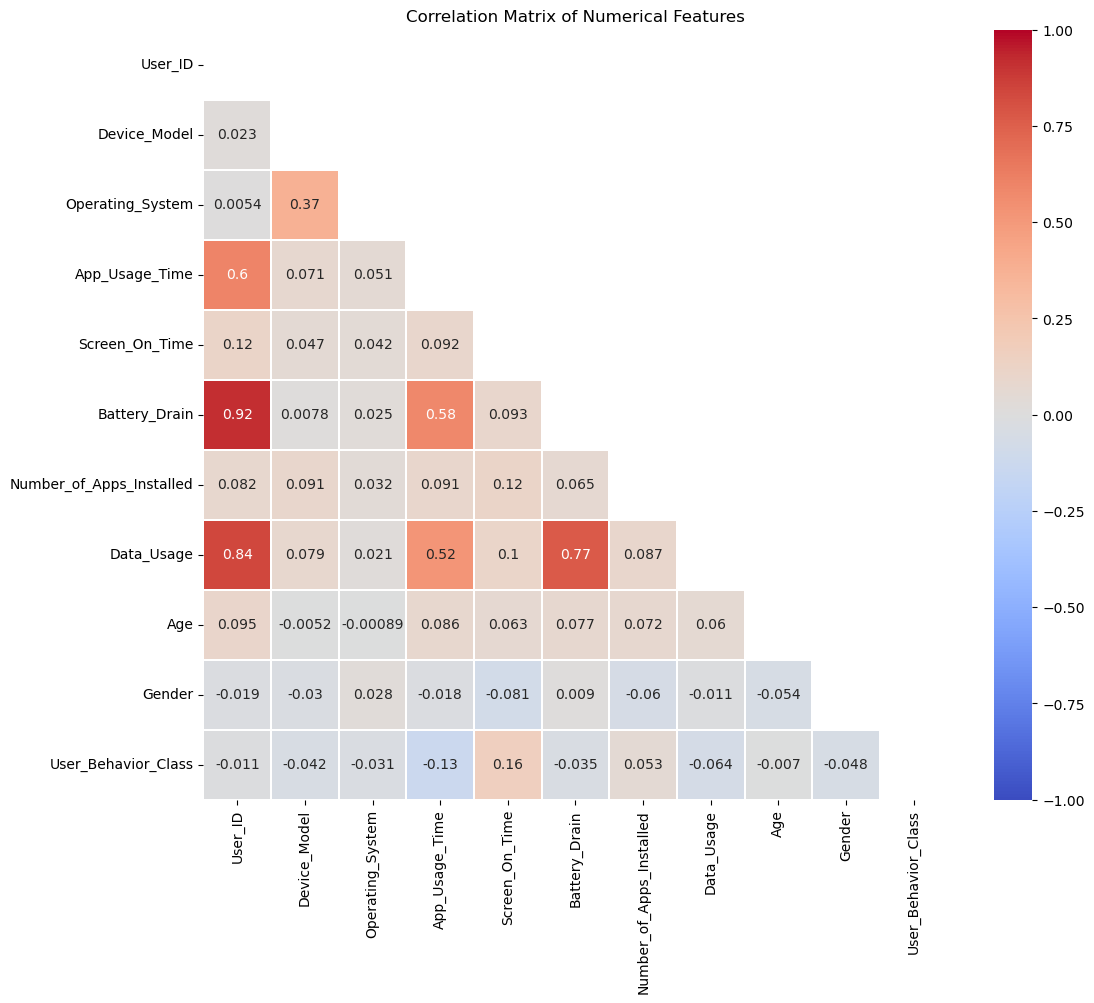

In [25]:
plt.figure(figsize=(12, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

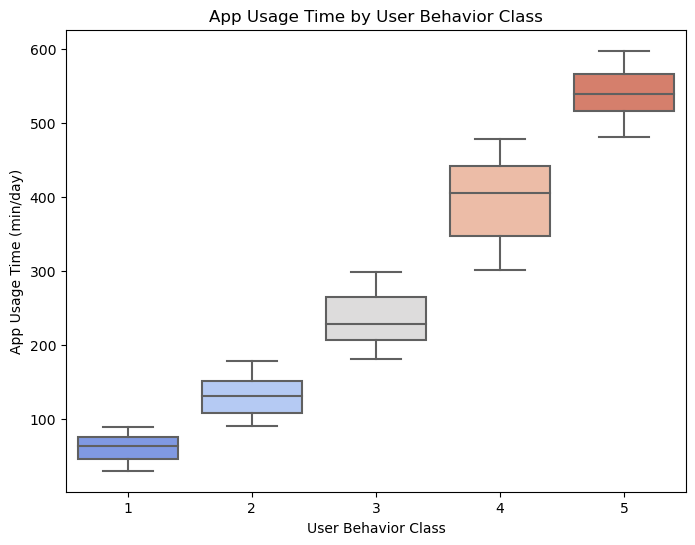

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User_Behavior_Class', y='App_Usage_Time', data=df, palette='coolwarm')
plt.title('App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
plt.show()

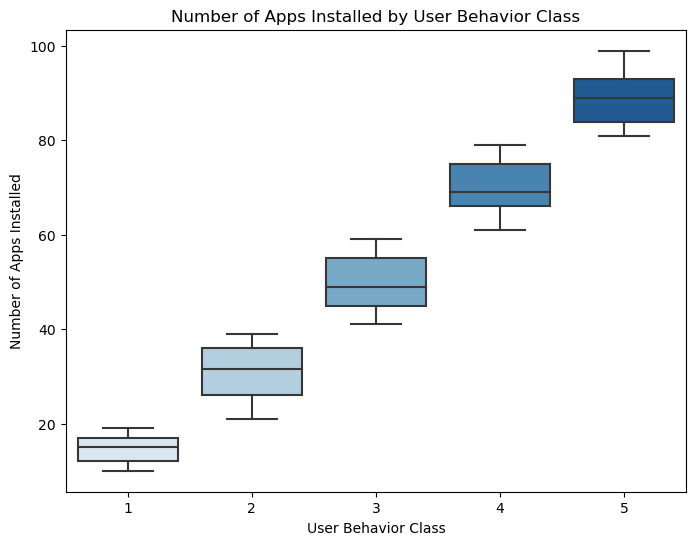

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User_Behavior_Class', y='Number_of_Apps_Installed', data=df, palette='Blues')
plt.title('Number of Apps Installed by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Apps Installed')
plt.show()

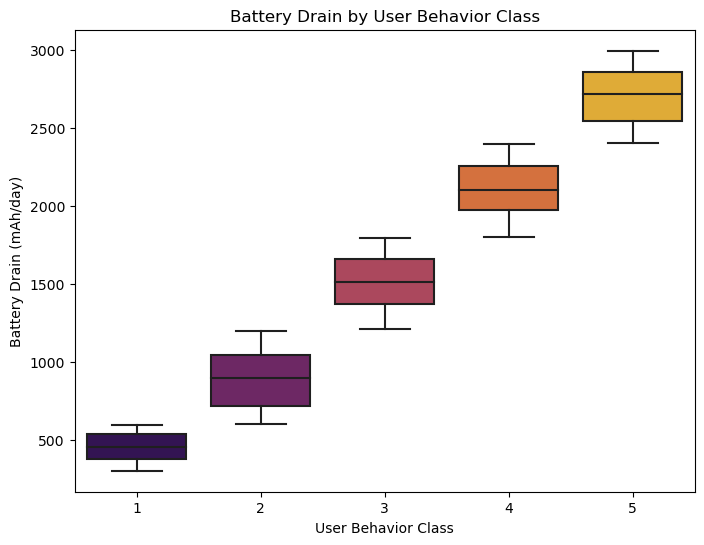

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='User_Behavior_Class', y='Battery_Drain', data=df, palette='inferno')
plt.title('Battery Drain by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

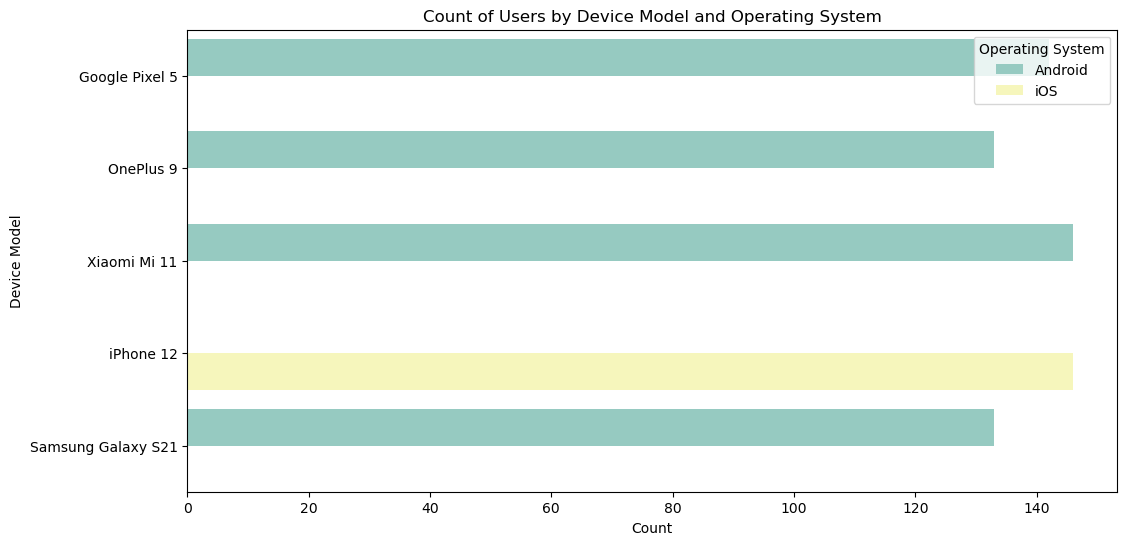

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Device_Model', hue='Operating_System', data=df, palette='Set3')
plt.title('Count of Users by Device Model and Operating System')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Operating System')
plt.show()

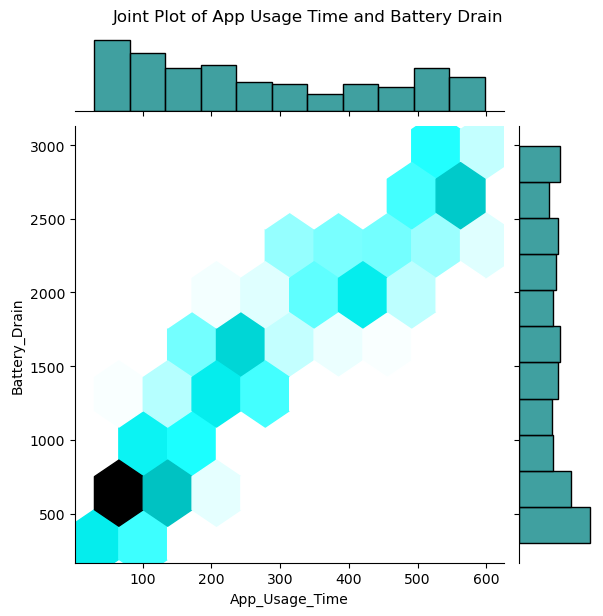

In [30]:
sns.jointplot(x='App_Usage_Time', y='Battery_Drain', data=df, kind='hex', color='teal')
plt.suptitle('Joint Plot of App Usage Time and Battery Drain', y=1.02)
plt.show()

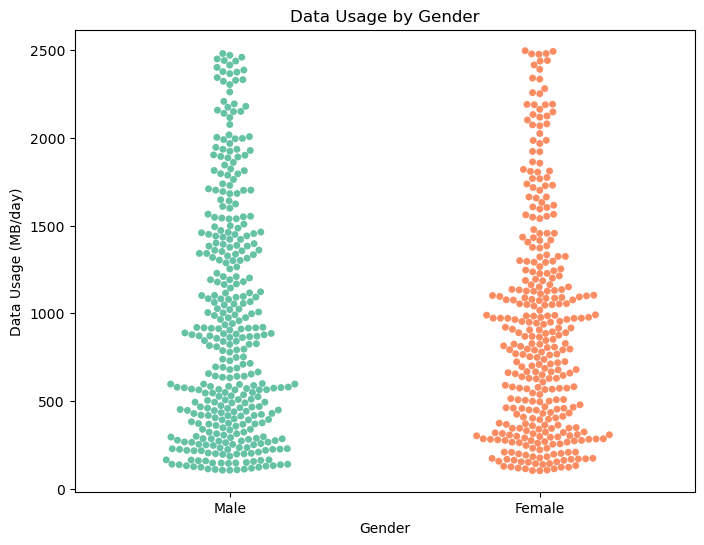

In [31]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='Data_Usage', data=df, palette='Set2')
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()

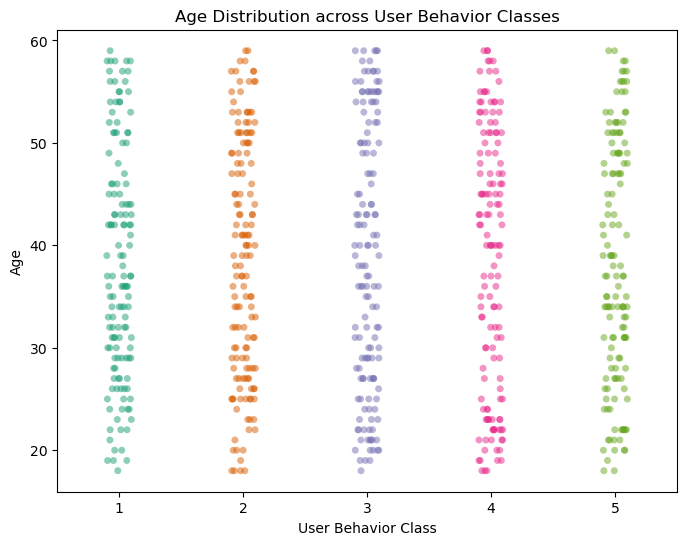

In [32]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='User_Behavior_Class', y='Age', data=df, jitter=True, alpha=0.5, palette='Dark2')
plt.title('Age Distribution across User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()

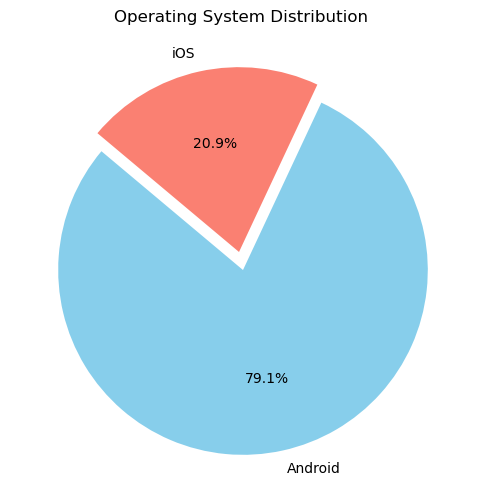

In [33]:
plt.figure(figsize=(6, 6))
df['Operating_System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

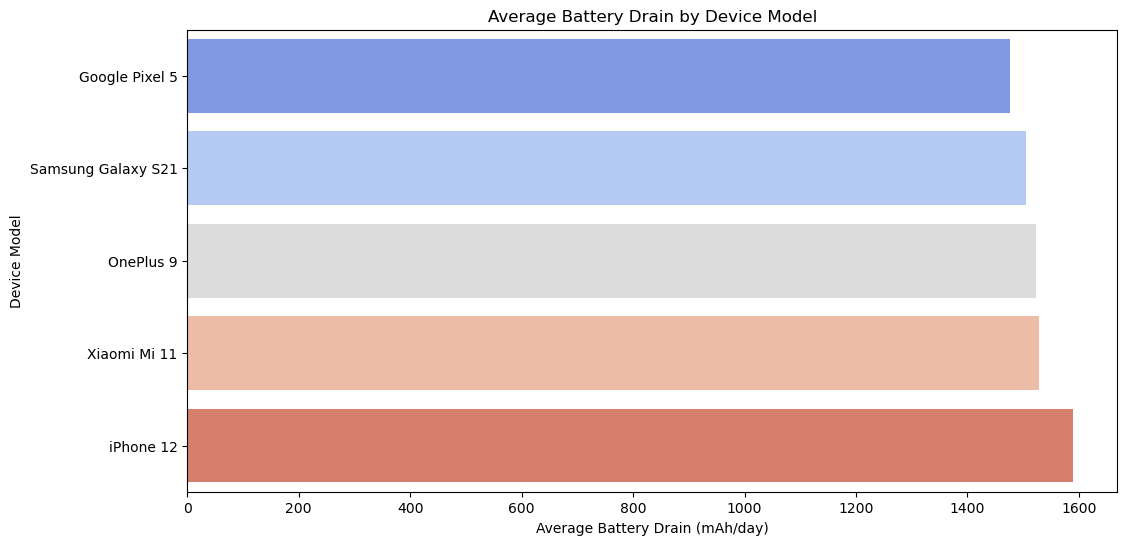

In [34]:
plt.figure(figsize=(12, 6))
avg_battery = df.groupby('Device_Model')['Battery_Drain'].mean().sort_values()
sns.barplot(x=avg_battery.values, y=avg_battery.index, palette='coolwarm')
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Average Battery Drain (mAh/day)')
plt.ylabel('Device Model')
plt.show()

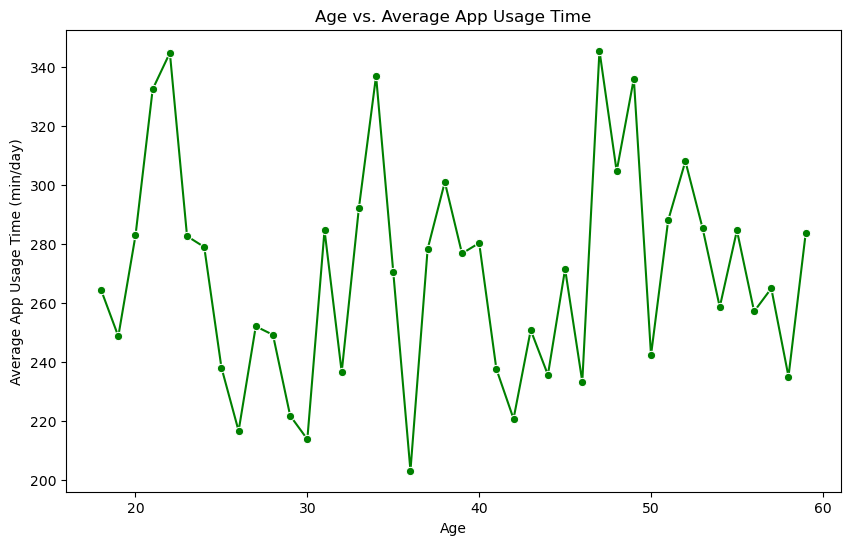

In [35]:
plt.figure(figsize=(10, 6))
age_usage = df.groupby('Age')['App_Usage_Time'].mean().reset_index()
sns.lineplot(x='Age', y='App_Usage_Time', data=age_usage, marker='o', color='green')
plt.title('Age vs. Average App Usage Time')
plt.xlabel('Age')
plt.ylabel('Average App Usage Time (min/day)')
plt.show()

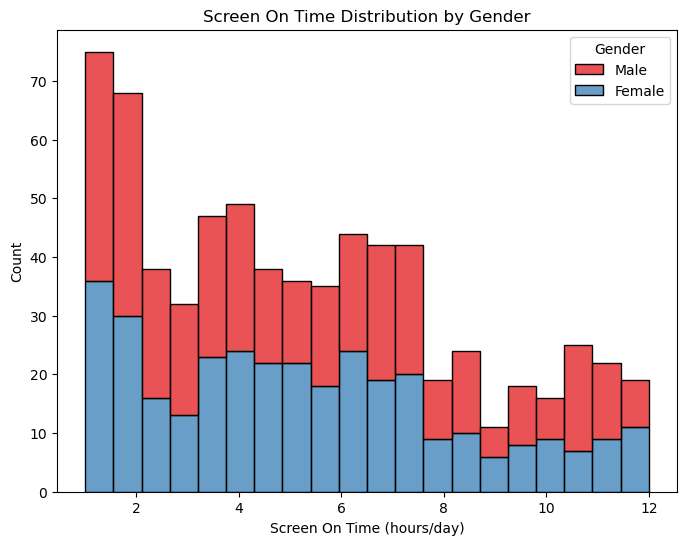

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Screen_On_Time', hue='Gender', multiple='stack', palette='Set1', bins=20)
plt.title('Screen On Time Distribution by Gender')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Count')
plt.show()

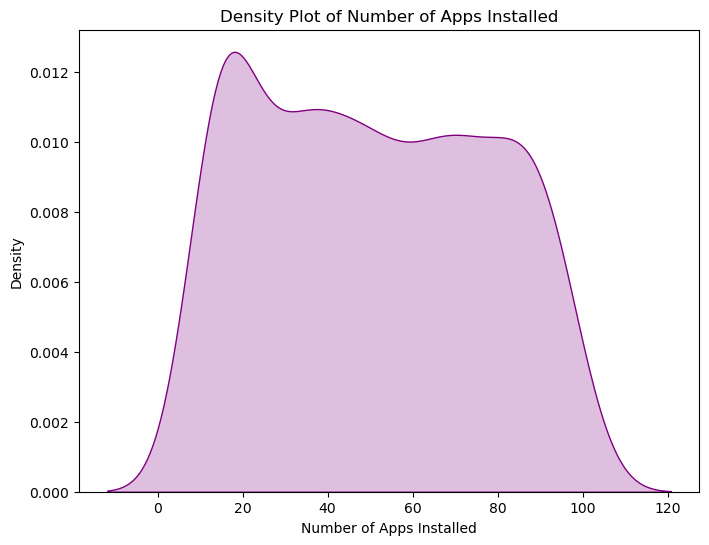

In [37]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Number_of_Apps_Installed', shade=True, color='purple')
plt.title('Density Plot of Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Density')
plt.show()

Model For Classification of User Behavior

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]


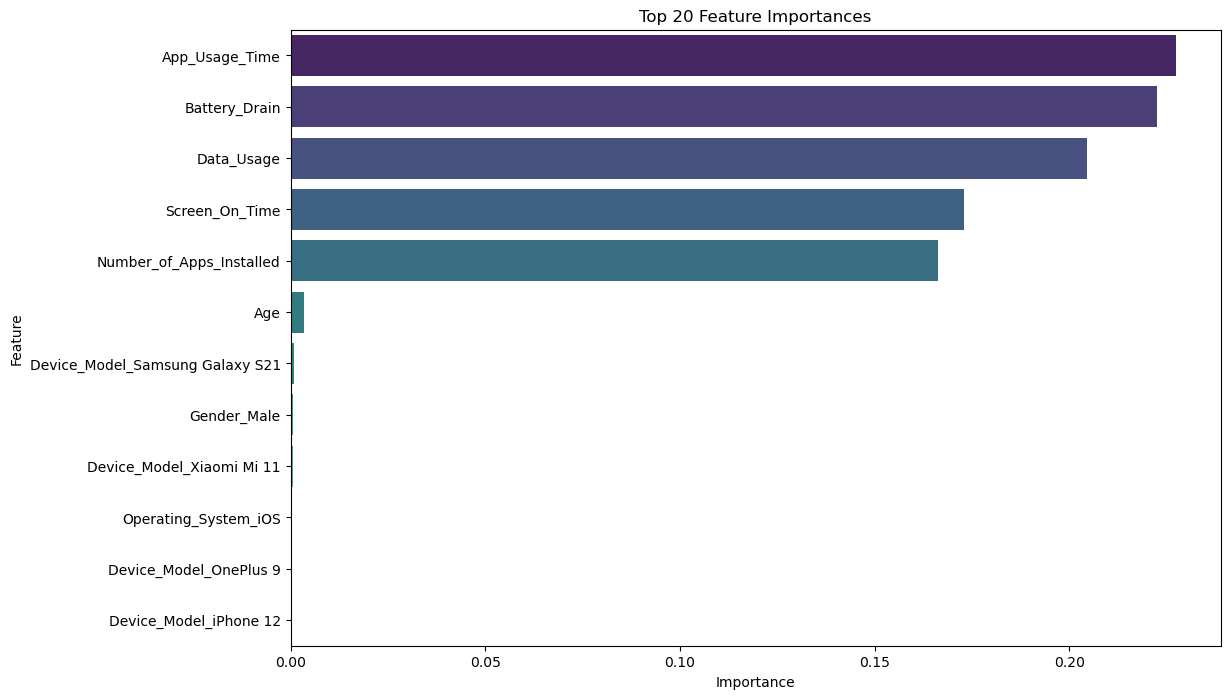

In [38]:
X = df.drop(['User_ID', 'User_Behavior_Class'], axis=1)
y = df['User_Behavior_Class']


categorical_cols = ['Device_Model', 'Operating_System', 'Gender']
numerical_cols = ['App_Usage_Time', 'Screen_On_Time', 'Battery_Drain',
                  'Number_of_Apps_Installed', 'Data_Usage', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    importances = model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances')
    plt.show()

Prediction of Battery Drain

Mean Absolute Error (MAE): 148.95990476190477
Mean Squared Error (MSE): 31249.32521238095
Root Mean Squared Error (RMSE): 176.7747866987285
R-squared (R²): 0.9516723527485257


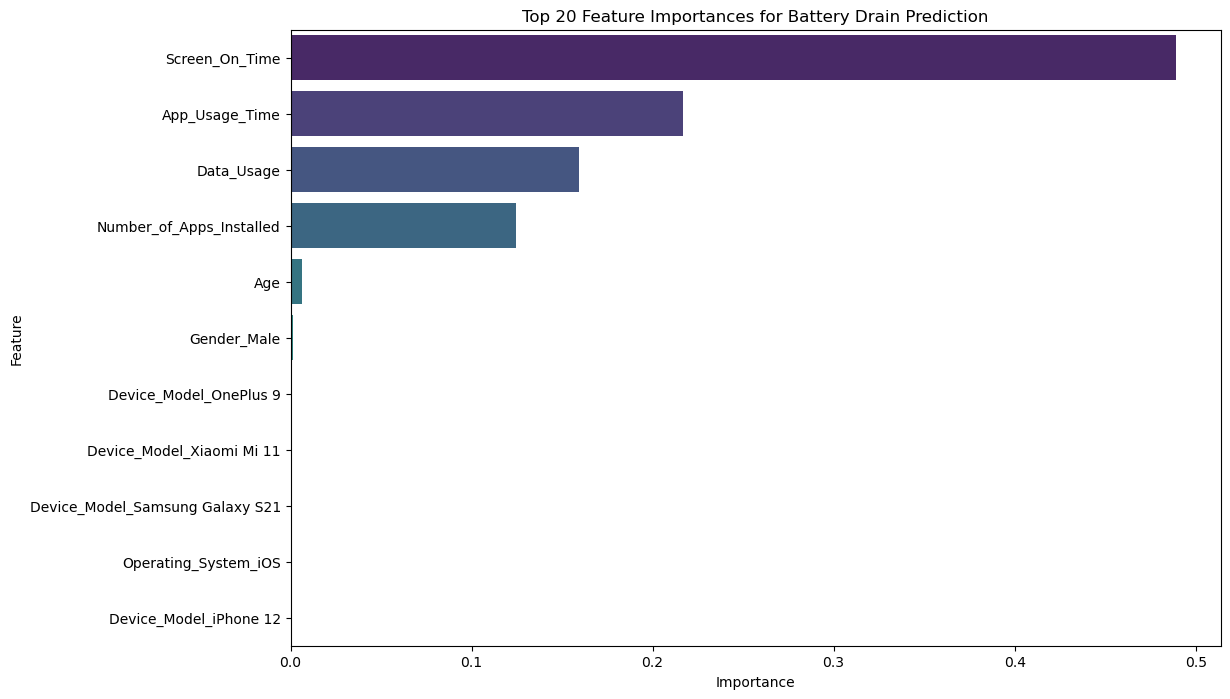

In [39]:
X = df.drop(['User_ID', 'Battery_Drain'], axis=1)   
y = df['Battery_Drain']

categorical_cols = ['Device_Model', 'Operating_System', 'Gender']
numerical_cols = ['App_Usage_Time', 'Screen_On_Time',
                  'Number_of_Apps_Installed', 'Data_Usage', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred))

if hasattr(model.named_steps['regressor'], 'feature_importances_'):
   
    ohe = model.named_steps['preprocessor'].named_transformers_['cat']
    feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
    
    importances = model.named_steps['regressor'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances for Battery Drain Prediction')
    plt.show()